In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [80]:
df = pd.read_csv('sample_data/covid_19_clean_complete.csv')
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [81]:
df.shape

(49068, 10)

In [82]:
df.rename(columns={'Province/State':'State','Country/Region':'Country'},inplace=True)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       14664 non-null  object 
 1   Country     49068 non-null  object 
 2   Lat         49068 non-null  float64
 3   Long        49068 non-null  float64
 4   Date        49068 non-null  object 
 5   Confirmed   49068 non-null  int64  
 6   Deaths      49068 non-null  int64  
 7   Recovered   49068 non-null  int64  
 8   Active      49068 non-null  int64  
 9   WHO Region  49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [84]:
df.isnull().sum()

State         34404
Country           0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [85]:
df.drop(columns = ['State'], inplace=True)
df.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [86]:
df['Country'].nunique()

187

In [87]:
country_stats = df.groupby('Country')[['Confirmed','Deaths','Recovered','Active']].agg('sum').reset_index()
country_stats.head()

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,1936390,49098,798240,1089052
1,Albania,196702,5708,118877,72117
2,Algeria,1179755,77972,755897,345886
3,Andorra,94404,5423,69074,19907
4,Angola,22662,1078,6573,15011


In [88]:
top10_conf = country_stats.nlargest(10,'Confirmed')
top10_conf

,Country,Confirmed,Deaths,Recovered,Active
173,US,224345948,11011411,56353416,156981121
23,Brazil,89524967,3938034,54492873,31094060
138,Russia,45408411,619385,25120448,19668578
79,India,40883464,1111831,23783720,15987913
157,Spain,27404045,3033030,15093583,9277432
177,United Kingdom,26748587,3997775,126217,22624595
85,Italy,26745145,3707717,15673910,7363518
61,France,21210926,3048524,7182115,10980287
65,Germany,21059152,871322,17107839,3079991
81,Iran,19339267,1024136,15200895,3114236


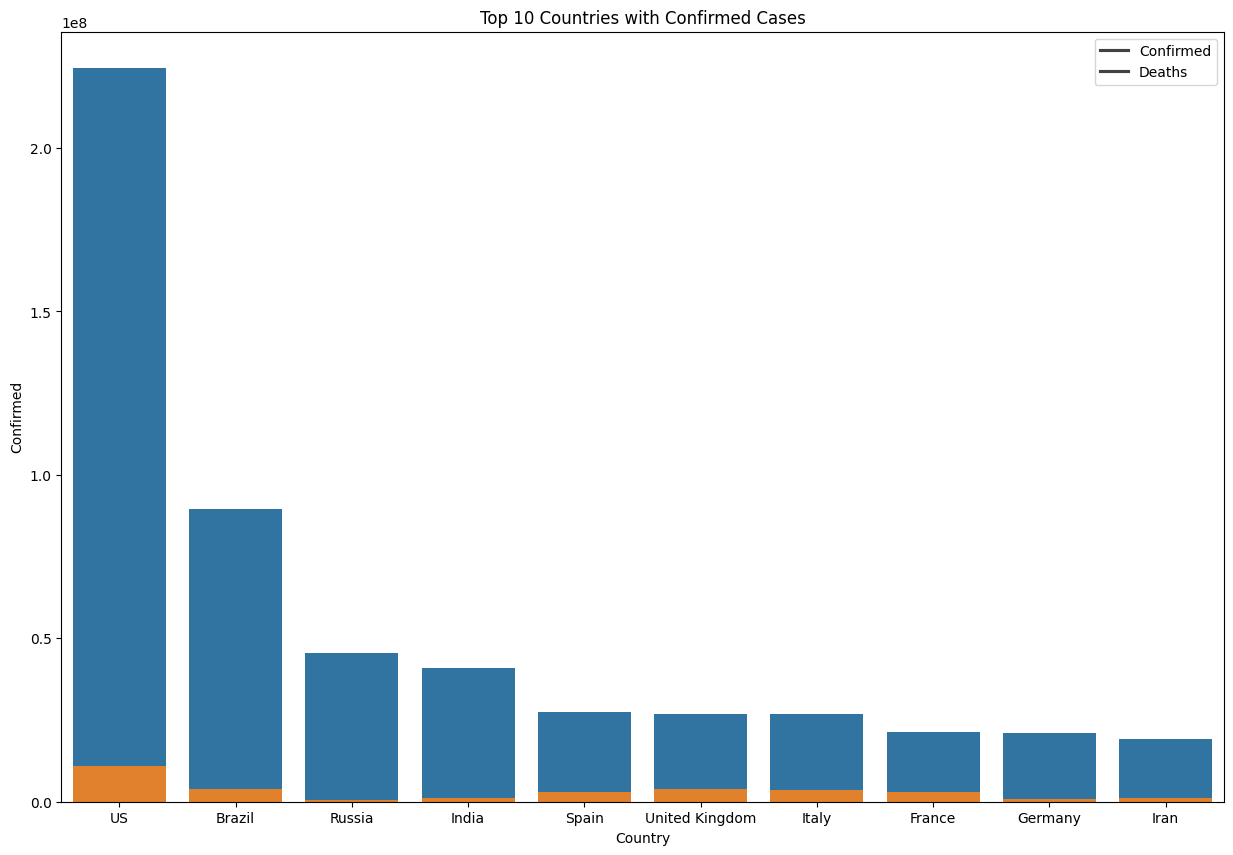

In [89]:
plt.figure(figsize=(15,10))
sns.barplot(data=top10_conf,y='Confirmed',x='Country')
sns.barplot(data=top10_conf,y='Deaths',x='Country')
plt.title('Top 10 Countries with Confirmed Cases')
plt.legend(['Confirmed','Deaths'])
plt.show()

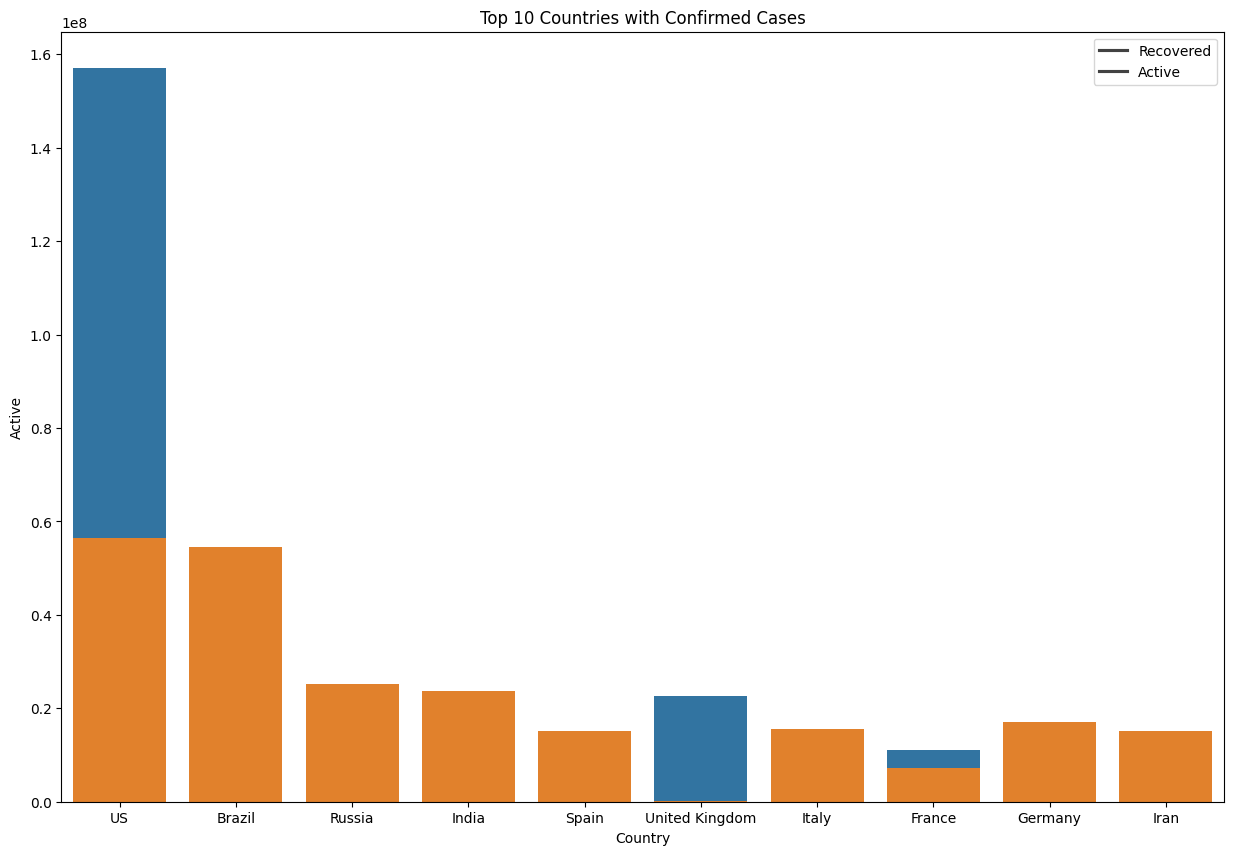

In [90]:
plt.figure(figsize=(15,10))
sns.barplot(data=top10_conf,y='Active',x='Country')
sns.barplot(data=top10_conf,y='Recovered',x='Country')
plt.title('Top 10 Countries with Confirmed Cases')
plt.legend(['Recovered','Active'])
plt.show()

In [91]:
fig = px.choropleth(country_stats, locations='Country', locationmode='country names', hover_name='Country',
                    color='Confirmed',title='Confirmed Cases Over Countries', color_continuous_scale='Peach')
fig.show()

In [92]:
fig = px.choropleth(country_stats, locations='Country', locationmode='country names', hover_name='Country',
                    color='Deaths',title='Death Cases Over Countries', color_continuous_scale='ice')
fig.show()

In [118]:
fig = px.choropleth(country_stats, locations='Country', locationmode='country names', hover_name='Country',
                    color='Recovered',title='Recovered Cases Over Countries', color_continuous_scale='greens')
fig.show()

In [117]:
fig = px.choropleth(country_stats, locations='Country', locationmode='country names', hover_name='Country',
                    color='Active',title='Active Cases Over Countries', color_continuous_scale='hot')
fig.show()

In [95]:
death_cases = df.groupby('Date')[['Deaths']].agg('sum').reset_index()
death_cases.head()

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56


In [96]:
death_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    188 non-null    object
 1   Deaths  188 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


In [97]:
death_cases.columns = ['ds','y']
death_cases['ds'] = pd.to_datetime(death_cases['ds'])
death_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      188 non-null    datetime64[ns]
 1   y       188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.1 KB


In [98]:
from prophet import Prophet

In [99]:
model = Prophet(interval_width=0.95)
model.fit(death_cases)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgiauzp74/l957soq6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgiauzp74/h903mqeb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85981', 'data', 'file=/tmp/tmpgiauzp74/l957soq6.json', 'init=/tmp/tmpgiauzp74/h903mqeb.json', 'output', 'file=/tmp/tmpgiauzp74/prophet_modelh0ftnrdo/prophet_model-20240706024929.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:49:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:49:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [100]:
future_dates = model.make_future_dataframe(periods=14, freq='D')
future_dates

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
197,2020-08-06
198,2020-08-07
199,2020-08-08
200,2020-08-09


In [101]:
forecast_deaths = model.predict(future_dates)
forecast_deaths

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-522.113015,-3539.367467,2416.880029,-522.113015,-522.113015,-191.187036,-191.187036,-191.187036,-191.187036,-191.187036,-191.187036,0.0,0.0,0.0,-713.300051
1,2020-01-23,-432.419147,-2910.280752,2926.673614,-432.419147,-432.419147,388.672090,388.672090,388.672090,388.672090,388.672090,388.672090,0.0,0.0,0.0,-43.747057
2,2020-01-24,-342.725280,-2344.918674,3489.480506,-342.725280,-342.725280,874.263328,874.263328,874.263328,874.263328,874.263328,874.263328,0.0,0.0,0.0,531.538048
3,2020-01-25,-253.031412,-2523.099951,3520.555304,-253.031412,-253.031412,726.888550,726.888550,726.888550,726.888550,726.888550,726.888550,0.0,0.0,0.0,473.857138
4,2020-01-26,-163.337545,-3190.304980,2772.779163,-163.337545,-163.337545,-165.600810,-165.600810,-165.600810,-165.600810,-165.600810,-165.600810,0.0,0.0,0.0,-328.938355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,2020-08-06,698308.575523,691155.290398,706454.458026,690768.334924,705945.228498,388.672090,388.672090,388.672090,388.672090,388.672090,388.672090,0.0,0.0,0.0,698697.247613
198,2020-08-07,703337.982946,694707.730964,713944.574121,694517.483885,712575.241664,874.263328,874.263328,874.263328,874.263328,874.263328,874.263328,0.0,0.0,0.0,704212.246274
199,2020-08-08,708367.390369,699494.735773,720036.023458,698608.534074,718836.584464,726.888550,726.888550,726.888550,726.888550,726.888550,726.888550,0.0,0.0,0.0,709094.278919
200,2020-08-09,713396.797793,702086.367291,725155.623449,702243.229693,725252.462945,-165.600810,-165.600810,-165.600810,-165.600810,-165.600810,-165.600810,0.0,0.0,0.0,713231.196982


In [102]:
forecast_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          202 non-null    datetime64[ns]
 1   trend                       202 non-null    float64       
 2   yhat_lower                  202 non-null    float64       
 3   yhat_upper                  202 non-null    float64       
 4   trend_lower                 202 non-null    float64       
 5   trend_upper                 202 non-null    float64       
 6   additive_terms              202 non-null    float64       
 7   additive_terms_lower        202 non-null    float64       
 8   additive_terms_upper        202 non-null    float64       
 9   weekly                      202 non-null    float64       
 10  weekly_lower                202 non-null    float64       
 11  weekly_upper                202 non-null    float64       

In [103]:
forecast_deaths[['yhat','yhat_lower','yhat_upper']] = forecast_deaths[['yhat','yhat_lower','yhat_upper']].astype(int)
forecast_deaths[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-713,-3539,2416
1,2020-01-23,-43,-2910,2926
2,2020-01-24,531,-2344,3489
3,2020-01-25,473,-2523,3520
4,2020-01-26,-328,-3190,2772
...,...,...,...,...
197,2020-08-06,698697,691155,706454
198,2020-08-07,704212,694707,713944
199,2020-08-08,709094,699494,720036
200,2020-08-09,713231,702086,725155


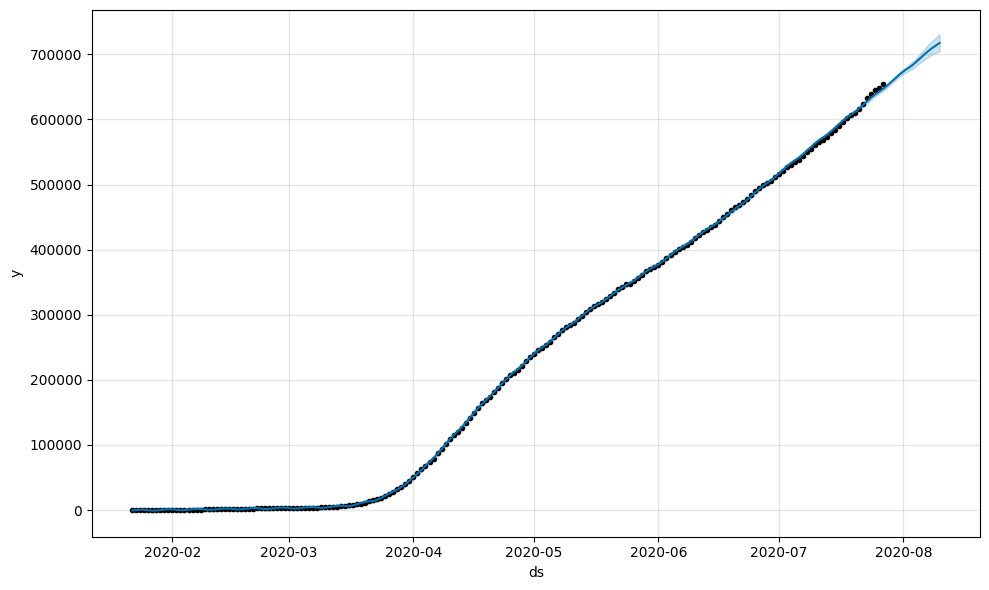

In [104]:
deaths_forecast = model.plot(forecast_deaths)

In [105]:
confirmed_cases = df.groupby('Date')[['Confirmed']].agg('sum').reset_index()
confirmed_cases.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [106]:
confirmed_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       188 non-null    object
 1   Confirmed  188 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


In [107]:
confirmed_cases.columns = ['ds','y']
confirmed_cases['ds'] = pd.to_datetime(confirmed_cases['ds'])
confirmed_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      188 non-null    datetime64[ns]
 1   y       188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.1 KB


In [108]:
model = Prophet(interval_width=0.95)
model.fit(confirmed_cases)
future_dates = model.make_future_dataframe(periods=14, freq='D')
future_dates

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgiauzp74/88_cjtu_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgiauzp74/tk0z_azu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77600', 'data', 'file=/tmp/tmpgiauzp74/88_cjtu_.json', 'init=/tmp/tmpgiauzp74/tk0z_azu.json', 'output', 'file=/tmp/tmpgiauzp74/prophet_modellke5lqi0/prophet_model-20240706024931.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:49:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:49:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
197,2020-08-06
198,2020-08-07
199,2020-08-08
200,2020-08-09


In [109]:
forecast_confirmed = model.predict(future_dates)
forecast_confirmed[['yhat', 'yhat_lower', 'yhat_upper']] = forecast_confirmed[['yhat', 'yhat_lower', 'yhat_upper']].astype(int)
forecast_confirmed[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-20676,-187407,153620
1,2020-01-23,-8050,-153589,147538
2,2020-01-24,5827,-161174,164057
3,2020-01-25,12176,-153344,182185
4,2020-01-26,8405,-139396,173722
...,...,...,...,...
197,2020-08-06,18171841,17954033,18387281
198,2020-08-07,18387030,18133163,18629792
199,2020-08-08,18594690,18321238,18849614
200,2020-08-09,18792229,18508378,19080697


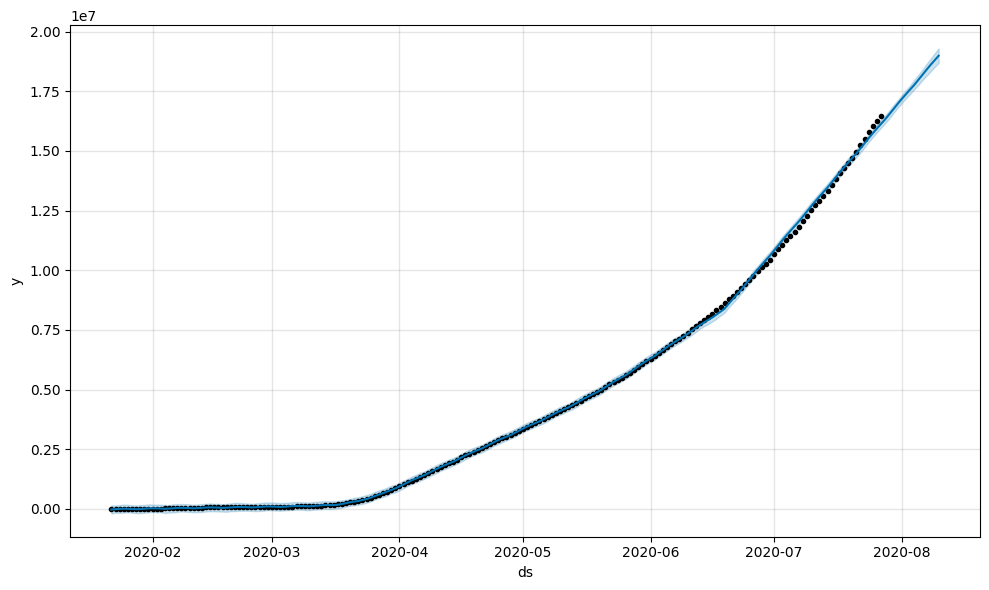

In [110]:
confirmed_forecast = model.plot(forecast_confirmed)

In [111]:
recover_cases = df.groupby('Date')[['Recovered']].agg('sum').reset_index()
recover_cases.columns = ['ds','y']
recover_cases['ds'] = pd.to_datetime(recover_cases['ds'])
recover_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      188 non-null    datetime64[ns]
 1   y       188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.1 KB


In [112]:
model = Prophet(interval_width=0.95)
model.fit(recover_cases)
future_dates = model.make_future_dataframe(periods=14, freq='D')
forecast_recovered = model.predict(future_dates)
forecast_recovered[['yhat', 'yhat_lower', 'yhat_upper']] = forecast_recovered[['yhat', 'yhat_lower', 'yhat_upper']].astype(int)
forecast_recovered[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgiauzp74/yy_gs2jz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgiauzp74/_ne25gw5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49197', 'data', 'file=/tmp/tmpgiauzp74/yy_gs2jz.json', 'init=/tmp/tmpgiauzp74/_ne25gw5.json', 'output', 'file=/tmp/tmpgiauzp74/prophet_model5_u_m8rm/prophet_model-20240706024932.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:49:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:49:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-18442,-137470,95847
1,2020-01-23,-11181,-132434,104852
2,2020-01-24,-5175,-126606,114622
3,2020-01-25,-407,-124756,116249
4,2020-01-26,-9825,-133358,109267
...,...,...,...,...
197,2020-08-06,10551687,10392913,10713637
198,2020-08-07,10693086,10521078,10886804
199,2020-08-08,10833247,10655871,11034817
200,2020-08-09,10959222,10752676,11193448


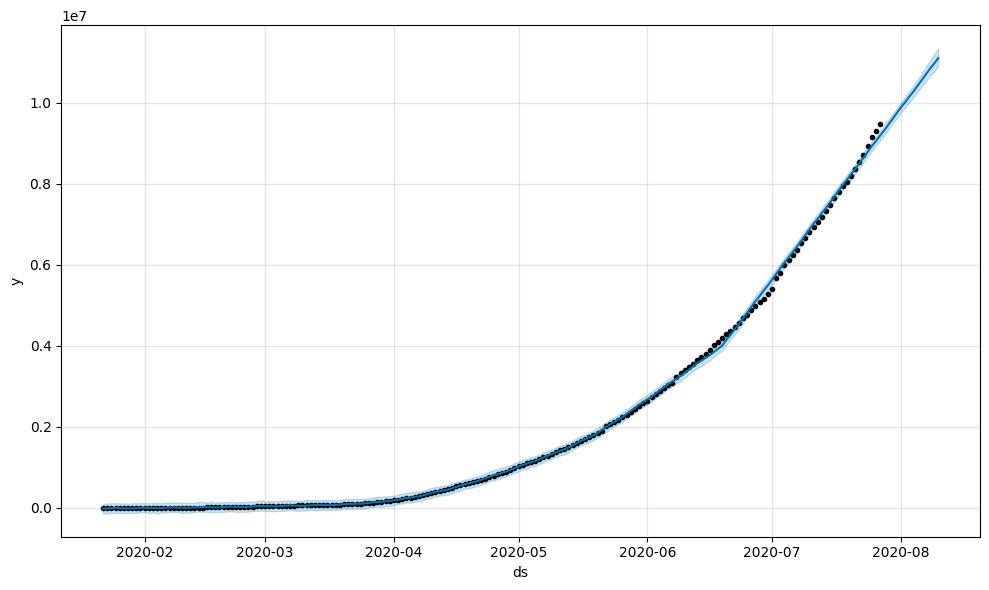

In [113]:
recover_cases_forecast = model.plot(forecast_recovered)

In [114]:
combined_forecast = pd.concat([
    forecast_deaths[['ds', 'yhat']].rename(columns={'yhat': 'deaths'}),
    forecast_confirmed[['ds', 'yhat']].rename(columns={'yhat': 'confirmed'}),
    forecast_recovered[['ds', 'yhat']].rename(columns={'yhat': 'recovered'})
], axis=1)
combined_forecast.head()


,ds,deaths,ds,confirmed,ds,recovered
0,2020-01-22,-713,2020-01-22,-20676,2020-01-22,-18442
1,2020-01-23,-43,2020-01-23,-8050,2020-01-23,-11181
2,2020-01-24,531,2020-01-24,5827,2020-01-24,-5175
3,2020-01-25,473,2020-01-25,12176,2020-01-25,-407
4,2020-01-26,-328,2020-01-26,8405,2020-01-26,-9825


In [115]:
combined_forecast = combined_forecast.loc[:,~combined_forecast.columns.duplicated()]

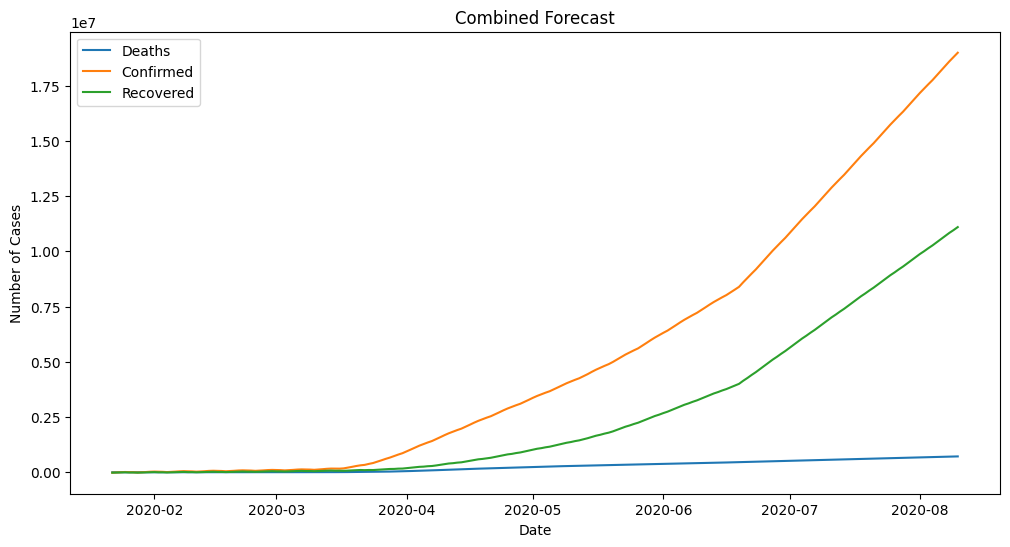

In [116]:
plt.figure(figsize=(12, 6))
plt.plot(combined_forecast['ds'], combined_forecast['deaths'], label='Deaths')
plt.plot(combined_forecast['ds'], combined_forecast['confirmed'], label='Confirmed')
plt.plot(combined_forecast['ds'], combined_forecast['recovered'], label='Recovered')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Combined Forecast')
plt.legend()
plt.show()